In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading csv file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spotify project/train.csv')

In [ ]:
# First approach to the Dataframe
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
# Brief summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
# Checking for null values
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
# We remove useless columns
df.drop(["Unnamed: 0", "track_id"], axis = 1, inplace=True)
df

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [ ]:
# We remove null values
df = df.dropna()

In [ ]:
df.isnull().sum()

artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
df.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

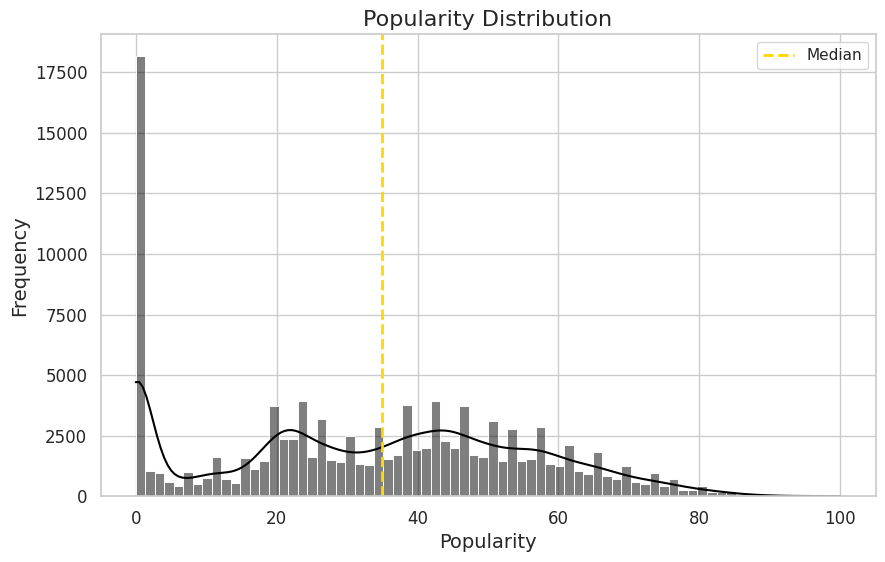

In [ ]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Use Seaborn to create the popularity distribution
sns.histplot(df['popularity'], kde=True, color='black')

# Customize the appearance of the plot
plt.title('Popularity Distribution', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a dashed vertical line for the median
plt.axvline(df['popularity'].median(), color='gold',
            linestyle='dashed', linewidth=2, label='Median')

# Show the legend
plt.legend()

<ipython-input-21-3d232f7a66ef>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

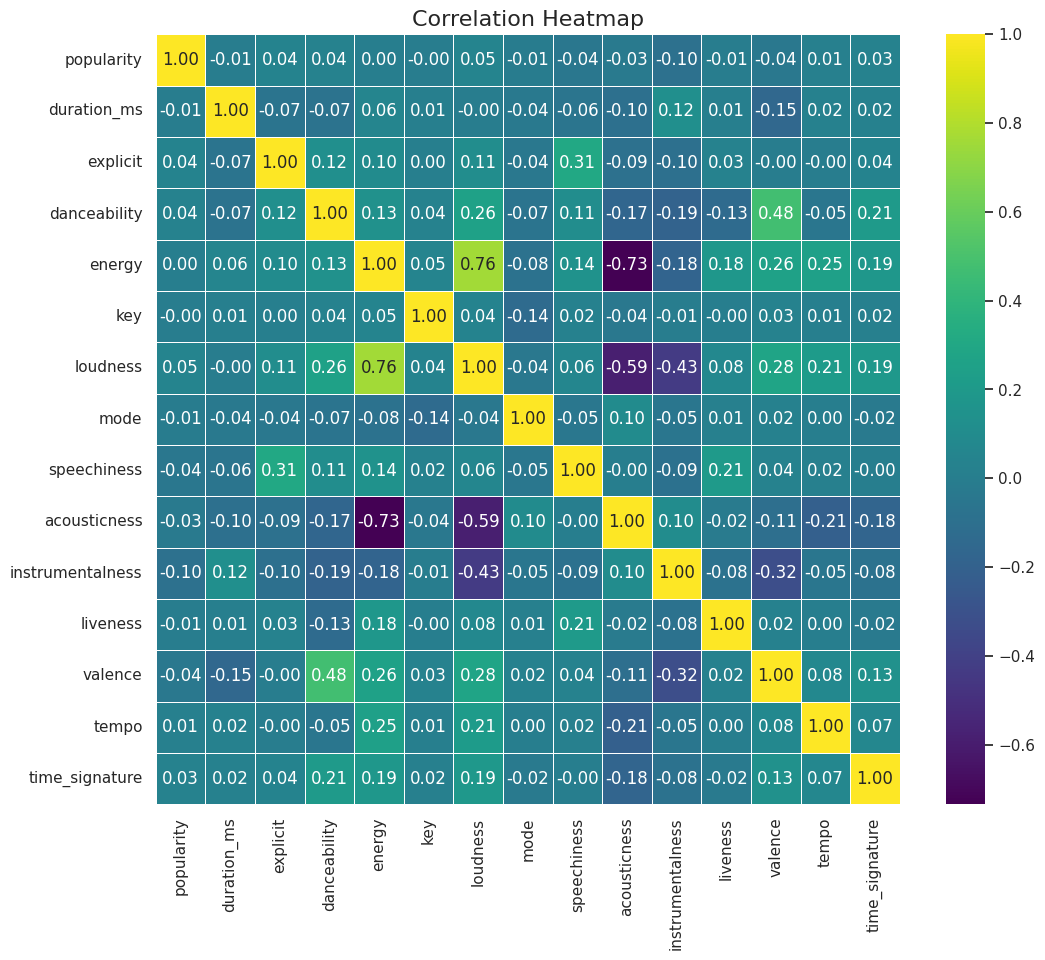

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the figure and axes
plt.figure(figsize=(12, 10))

# Use Seaborn to create the correlation heatmap
sns.heatmap(correlation_matrix, cmap='viridis', annot=True,
            fmt=".2f", linewidths=.5)

# Customize the appearance of the correlation heatmap
plt.title('Correlation Heatmap', fontsize=16)

Text(0.5, 1.0, 'Proportion of Explicit Songs')

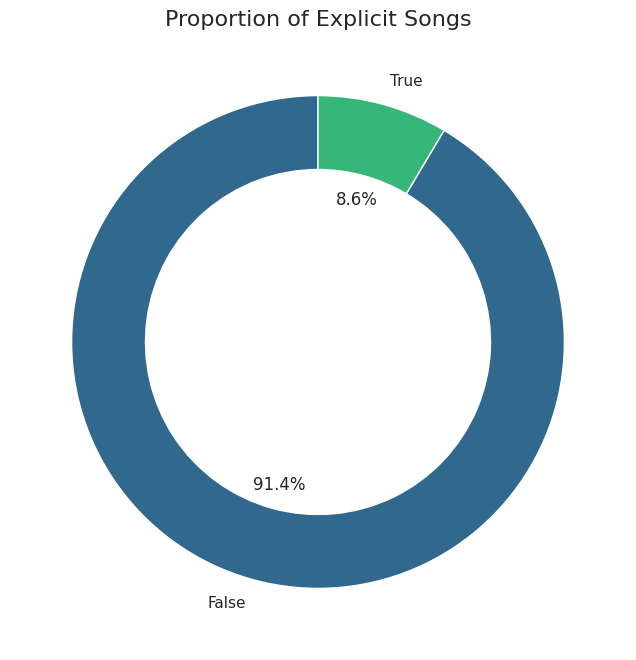

In [ ]:
# Calculate the proportion of explicit songs
explicit_counts = df['explicit'].value_counts()
explicit_proportion = explicit_counts / explicit_counts.sum()

# Create the figure and axes
plt.figure(figsize=(8, 8))

# Use a donut chart with the 'viridis' color palette
colors = sns.color_palette('viridis', len(explicit_proportion))
plt.pie(explicit_proportion, labels=explicit_proportion.index,
        autopct='%1.1f%%', colors=colors, startangle=90,
        wedgeprops=dict(width=0.3, edgecolor='w'))

# Customize the appearance of the chart
plt.title('Proportion of Explicit Songs', fontsize=16)

Text(0.5, 1.02, 'Distribution of Musical Attributes')

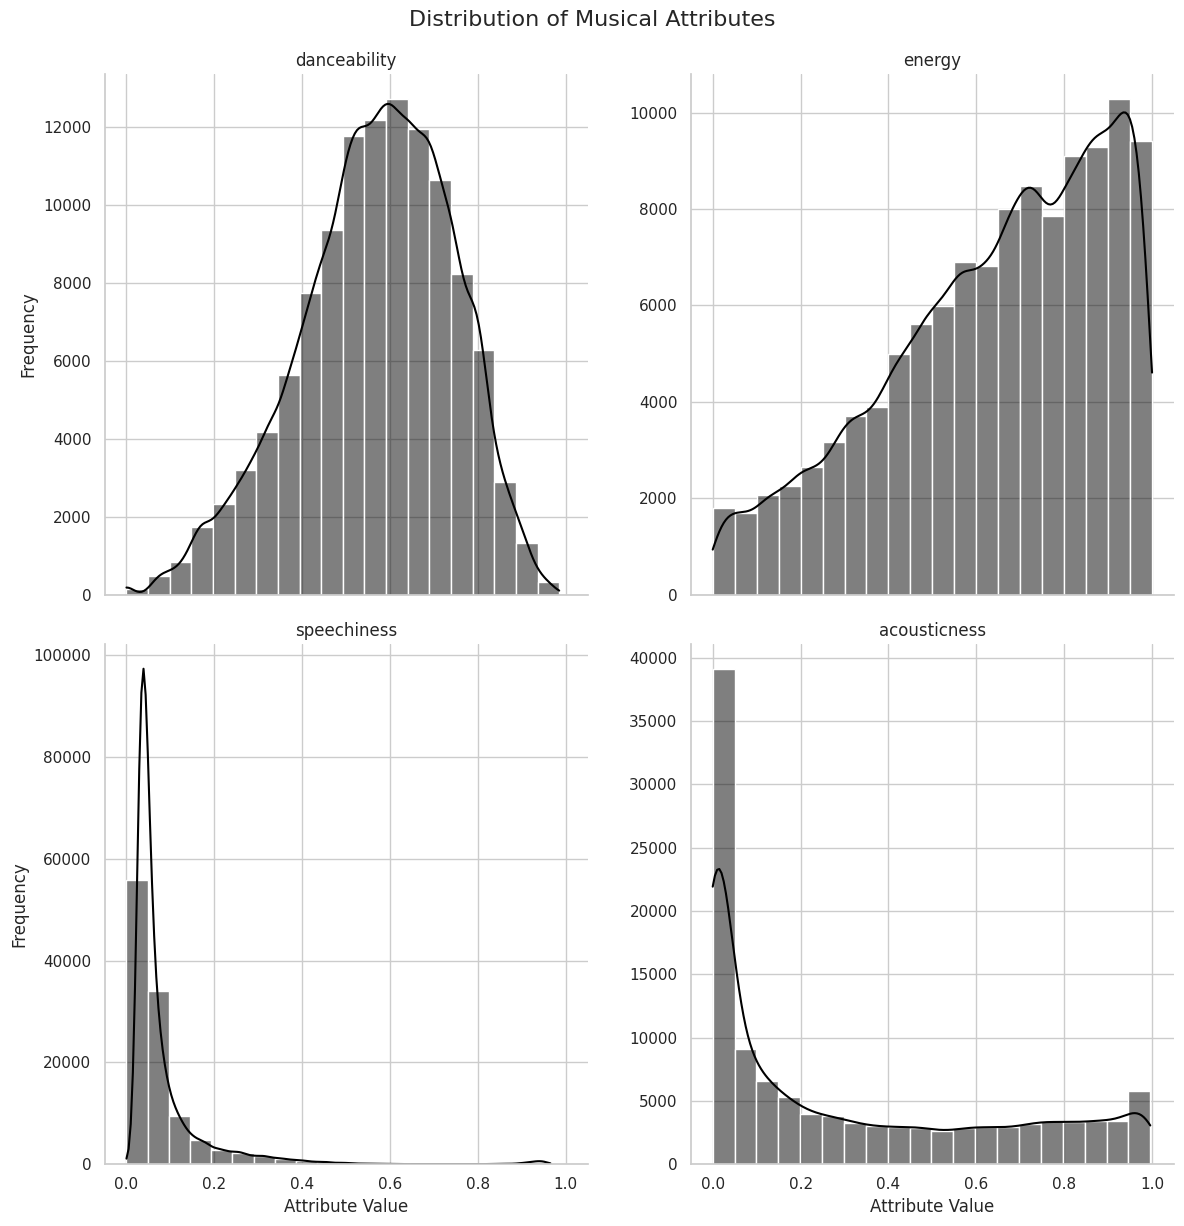

In [ ]:
# Select the musical attributes
musical_attributes = ['danceability', 'energy', 'speechiness', 'acousticness']

# Melt the DataFrame to long format for FacetGrid
df_melted = df.melt(value_vars=musical_attributes,
                    var_name='attribute', value_name='value')

# Create a FacetGrid for the distribution plots
g = sns.FacetGrid(df_melted, col="attribute", col_wrap=2,
                  height=6, sharey=False)
g.map(sns.histplot, 'value', kde=True, bins=20, color='black')

# Customize the appearance of the plot
g.set_axis_labels('Attribute Value', 'Frequency')
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Distribution of Musical Attributes', y=1.02, fontsize=16)


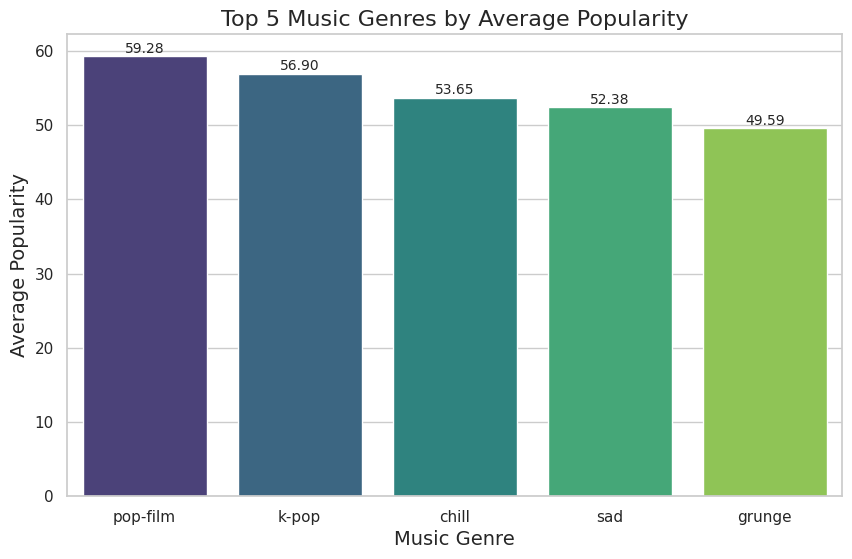

In [30]:
# Select the top 5 music genres with the highest average popularity
top_genres = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(5)

# Create a custom palette (Viridis)
custom_palette = sns.color_palette('viridis', n_colors=len(top_genres))

# Create a bar chart
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=top_genres.index, y=top_genres.values,
                       palette=custom_palette)

# Customize the chart
plt.title('Top 5 Music Genres by Average Popularity', fontsize=16)
plt.xlabel('Music Genre', fontsize=14)
plt.ylabel('Average Popularity', fontsize=14)

# Show the popularity value on each bar
for index, value in enumerate(top_genres.values):
    bar_plot.text(index, value + 0.1, f'{value:.2f}', ha='center',
                  va='bottom', fontsize=10)

Text(0, 0.5, 'Tempo')

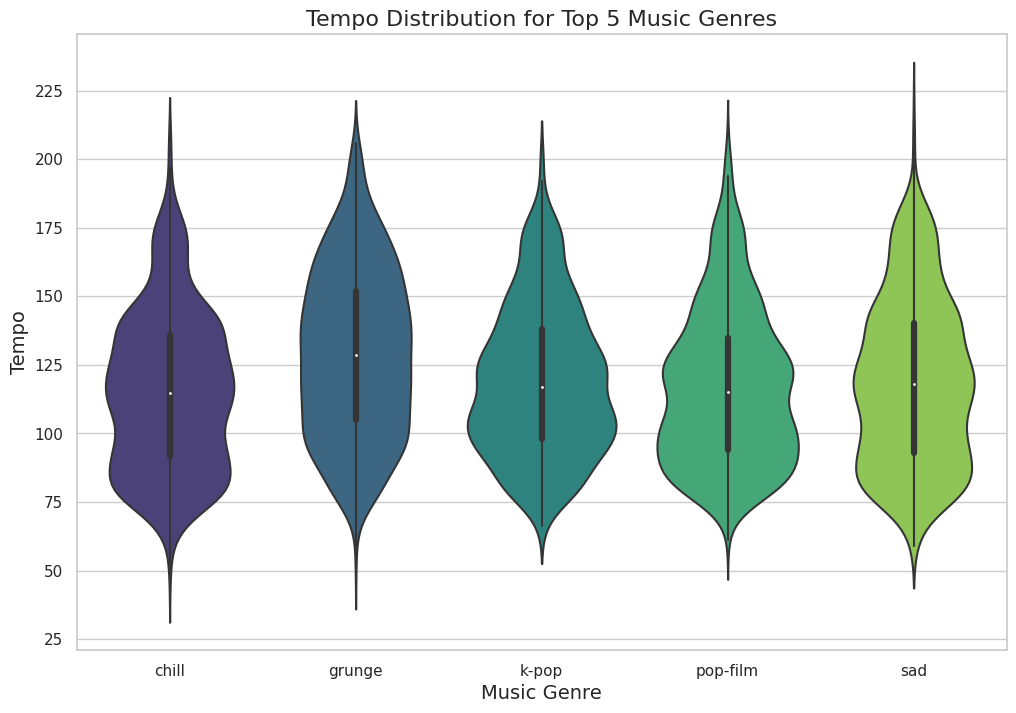

In [31]:
# Filter the DataFrame to include only the top 5 genres
df_top_genres = df[df['track_genre'].isin(top_genres.index)]

# Create a violin plot
plt.figure(figsize=(12, 8))
violin_plot = sns.violinplot(x='track_genre', y='tempo', data=df_top_genres,
                             palette='viridis')

# Customize the plot
plt.title('Tempo Distribution for Top 5 Music Genres', fontsize=16)
plt.xlabel('Music Genre', fontsize=14)
plt.ylabel('Tempo', fontsize=14)

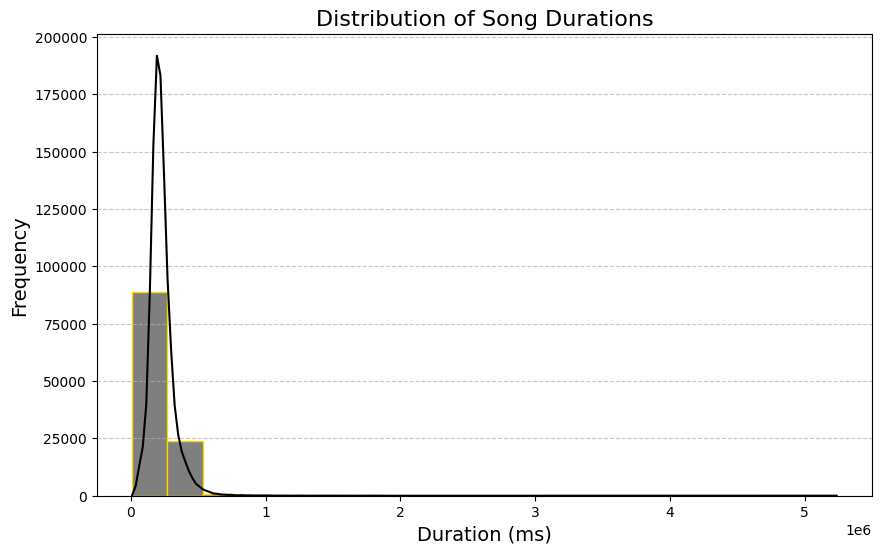

In [ ]:
# Create a histogram of song durations
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(df['duration_ms'], bins=20, kde=True, color='black',
                         edgecolor='gold')

# Customize the plot
plt.title('Distribution of Song Durations', fontsize=16)
plt.xlabel('Duration (ms)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

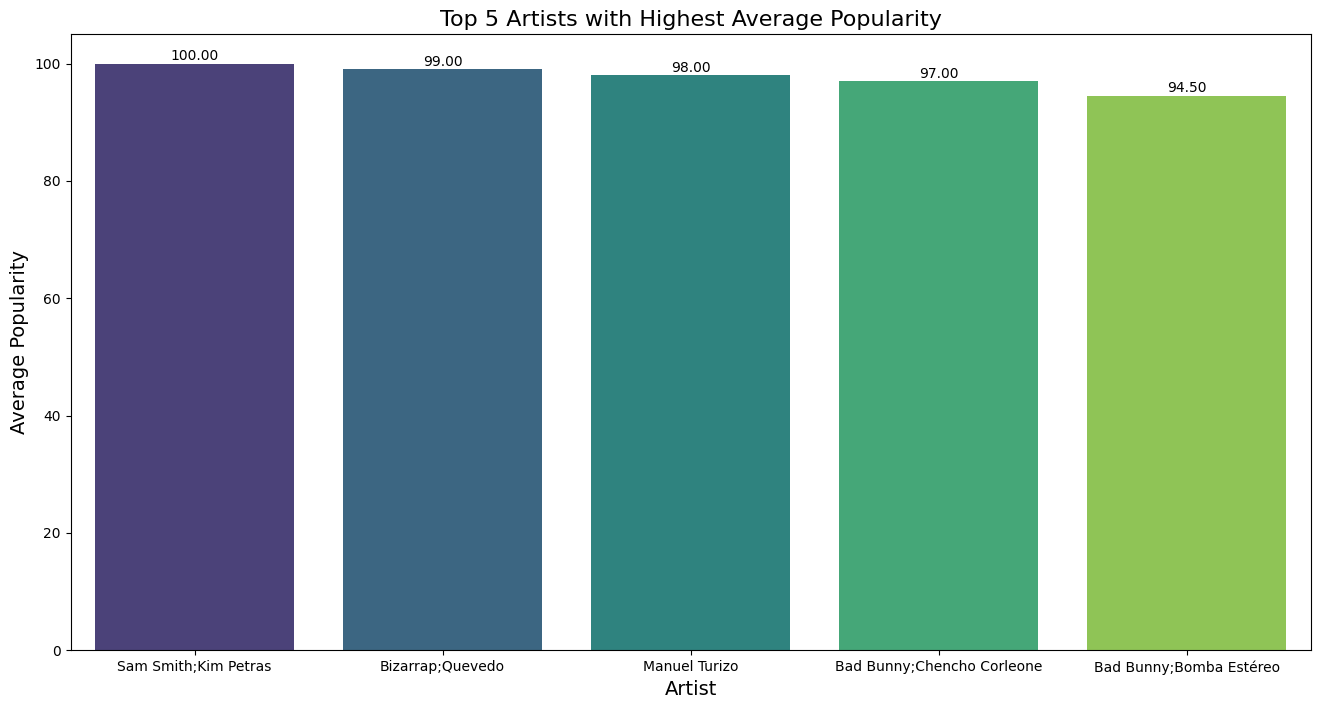

In [ ]:
# Group by artists and calculate the mean popularity
top_artists = df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(5)

# Create a bar plot
plt.figure(figsize=(16, 8))
bar_plot = sns.barplot(x=top_artists.index, y=top_artists.values,
                       palette='viridis')

# Customize the plot
plt.title('Top 5 Artists with Highest Average Popularity', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Average Popularity', fontsize=14)

# Show the popularity value on each bar
for index, value in enumerate(top_artists.values):
    bar_plot.text(index, value + 0.1, f'{value:.2f}', ha='center',
                  va='bottom', fontsize=10)

<ipython-input-19-1857252b0524>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mode_label'] = df['mode'].map(mode_labels)


([<matplotlib.axis.XTick at 0x7e05df9f8280>,
 [Text(0, 0, 'Minor (0)'), Text(1, 0, 'Major (1)')])

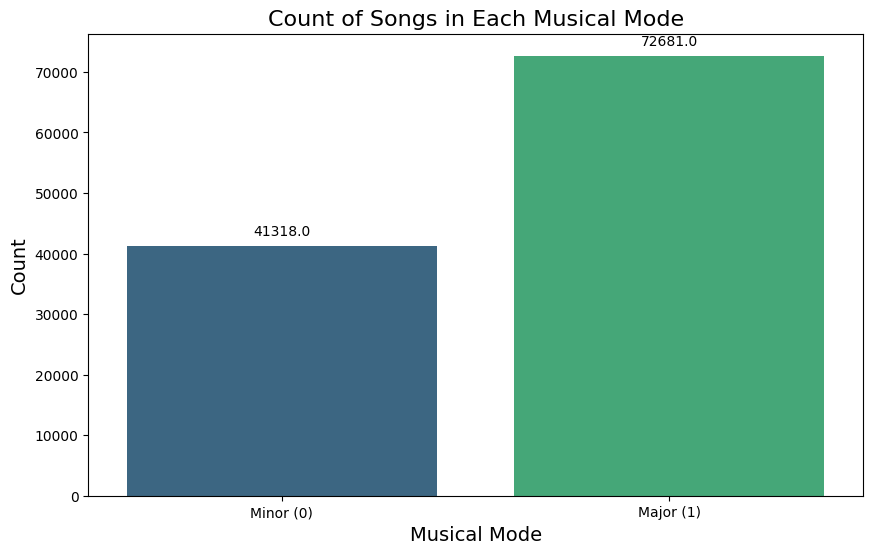

In [ ]:
# Create a mapping for mode labels
mode_labels = {0: 'Minor', 1: 'Major'}

# Map the 'mode' column to the corresponding labels
df['mode_label'] = df['mode'].map(mode_labels)

# Create a bar plot for the count of songs in each mode
plt.figure(figsize=(10, 6))
bar_plot = sns.countplot(x='mode_label', data=df, palette='viridis')

# Customize the plot
plt.title('Count of Songs in Each Musical Mode', fontsize=16)
plt.xlabel('Musical Mode', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add count labels on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                      textcoords='offset points')

# Show the mode labels below the plot
plt.xticks([0, 1], ['Minor (0)', 'Major (1)'], rotation=0)

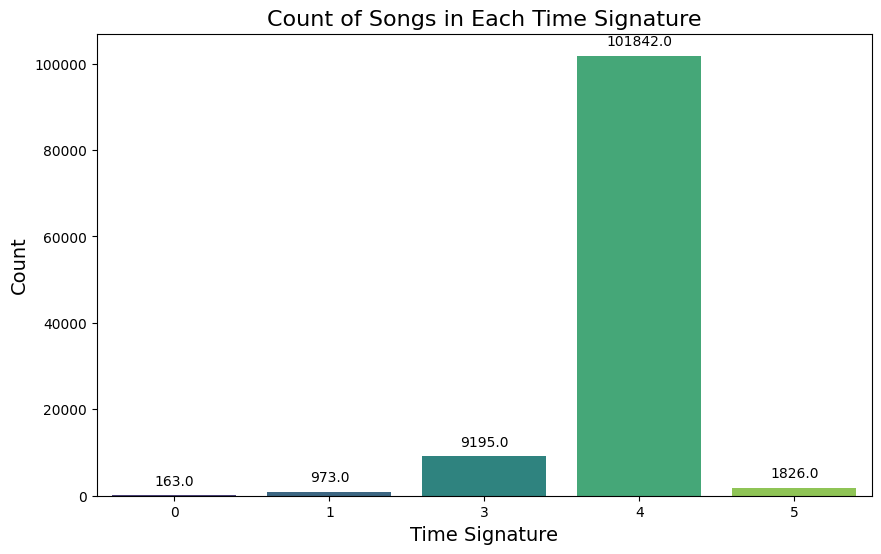

In [ ]:
# Create a bar plot for the count of songs in each time signature
plt.figure(figsize=(10, 6))
bar_plot = sns.countplot(x='time_signature', data=df, palette='viridis')

# Customize the plot
plt.title('Count of Songs in Each Time Signature', fontsize=16)
plt.xlabel('Time Signature', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add count labels on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                      textcoords='offset points')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

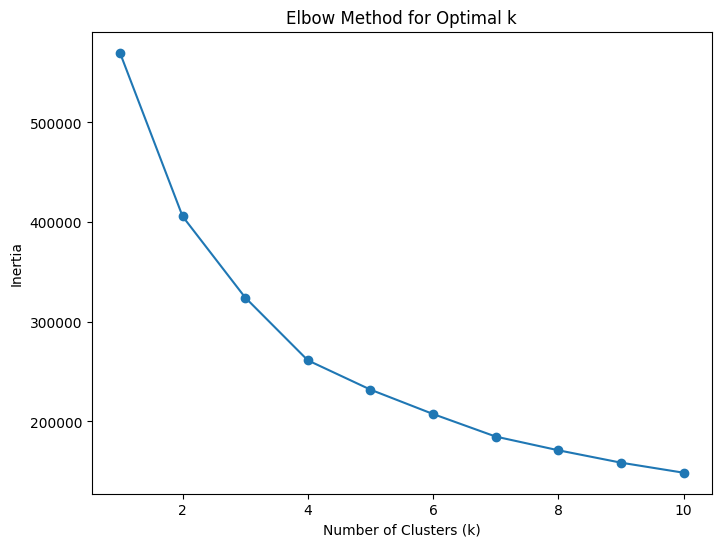

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

features = df[['danceability', 'energy', 'speechiness',
               'acousticness', 'valence']]

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Energy')

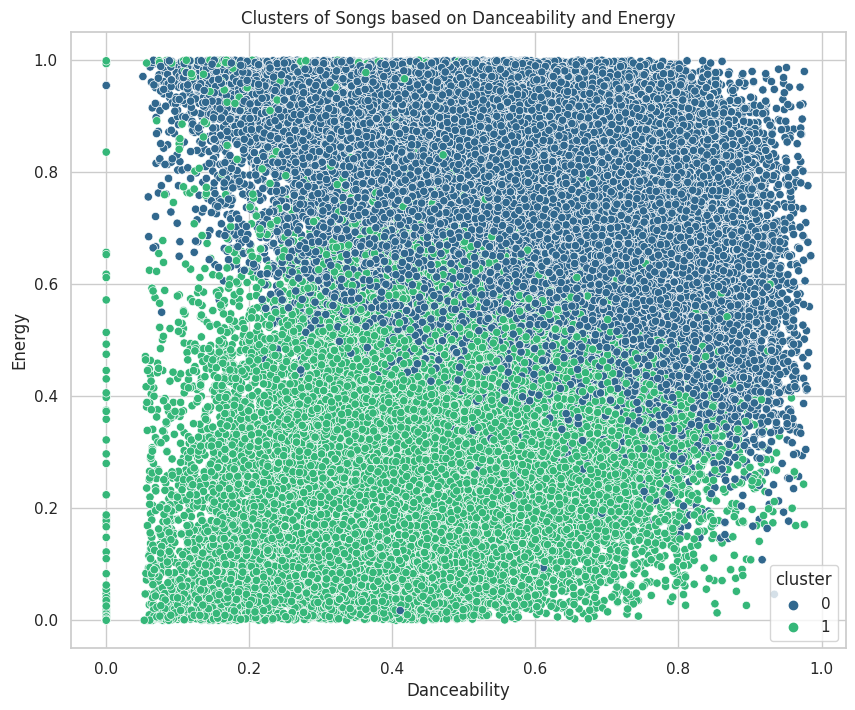

In [17]:
# Based on the elbow method graph, select a value for k
# Assume we choose k=2, but you can adjust it based on the graph

# Apply the K-Means algorithm with the optimal number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add the results to the original DataFrame
df['cluster'] = clusters

# Visualize the distribution of songs in each cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(x='danceability', y='energy', hue='cluster',
                data=df, palette='viridis', legend='full')
plt.title('Clusters of Songs based on Danceability and Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')

Silhouette Score: 0.31677680025404775


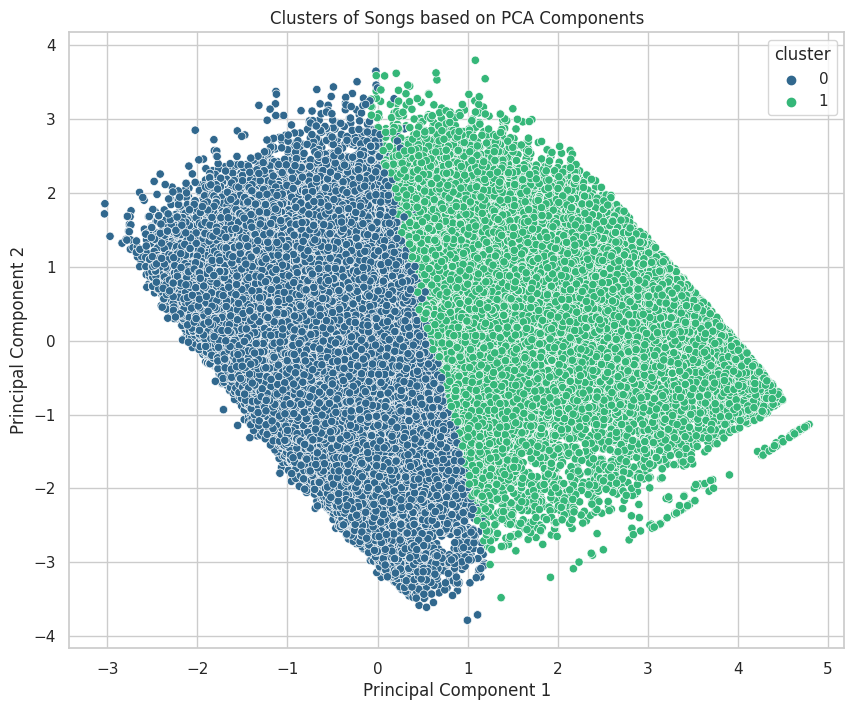

In [18]:
# Perform Principal Component Analysis (PCA) to visualize in 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

# Add PCA results to the DataFrame
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Visualize PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df,
                palette='viridis', legend='full')
plt.title('Clusters of Songs based on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Calculate the silhouette score to evaluate clustering quality
silhouette_avg = silhouette_score(features_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

In [19]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(features_scaled, clusters)
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 1.243817851084081


In [20]:
from sklearn.metrics import calinski_harabasz_score
ch_index = calinski_harabasz_score(features_scaled, clusters)
print(f'Calinski-Harabasz Index: {ch_index}')

Calinski-Harabasz Index: 46119.85130764546


In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(features_scaled)
inertia = kmeans.inertia_
print(f'Inertia (Within-Cluster Sum of Squares): {inertia}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia (Within-Cluster Sum of Squares): 405819.1612343042


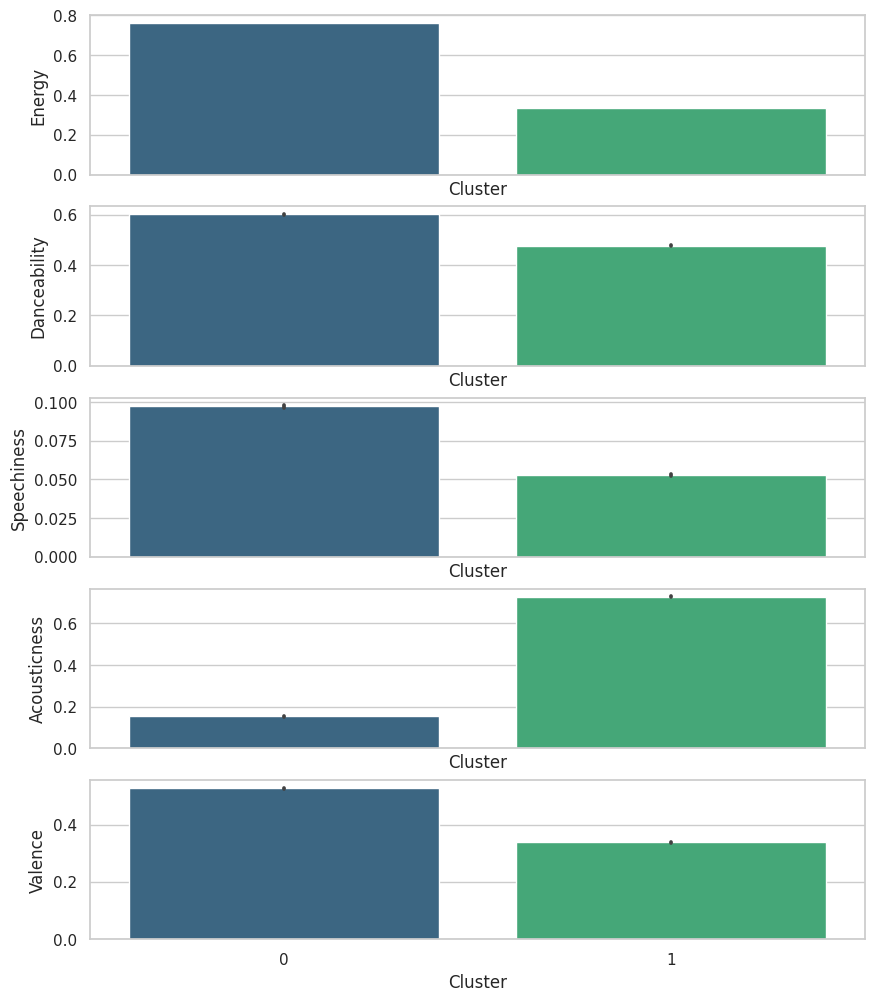

In [27]:
# Define the features to analyze
features_to_analyze = ['energy', 'danceability', 'speechiness', 'acousticness', 'valence']

# Set the style for better readability
sns.set(style="whitegrid")

# Create subplots for each feature
fig, axes = plt.subplots(len(features_to_analyze), 1, figsize=(10, 12), sharex=True)

# Plot average values for each feature across clusters
for i, feature in enumerate(features_to_analyze):
    sns.barplot(x='cluster', y=feature, data=df, ax=axes[i], palette='viridis')
    axes[i].set_ylabel(f'{feature.capitalize()}')
    axes[i].set_xlabel('Cluster')

In [24]:
# Calculate average values for each feature across clusters
avg_values = df.groupby('cluster')[features_to_analyze].mean()

# Define cluster profiles based on dominant characteristics
cluster_profiles = []

for cluster_id, avg_row in avg_values.iterrows():
    profile = f"Cluster {cluster_id + 1}:"
    for feature in features_to_analyze:
        if avg_row[feature] > avg_values[feature].mean():
            profile += f" High {feature.capitalize()},"
        else:
            profile += f" Low {feature.capitalize()},"
    cluster_profiles.append(profile[:-1])  # Remove the trailing comma

# Print the cluster profiles
for profile in cluster_profiles:
    print(profile)

Cluster 1: High Energy, High Danceability, High Speechiness, Low Acousticness, High Valence
Cluster 2: Low Energy, Low Danceability, Low Speechiness, High Acousticness, Low Valence


In [28]:
# Sort the DataFrame by cluster and popularity
df_sorted = df.sort_values(by=['cluster', 'popularity'], ascending=[True, False])

# Group by cluster and select the top song for each cluster
top_songs_by_cluster = df_sorted.groupby('cluster').head(1)

# Display the top songs for each cluster
print('Top Songs by Cluster:')
print(top_songs_by_cluster[['cluster', 'track_name', 'artists', 'popularity']])

Top Songs by Cluster:
       cluster                 track_name               artists  popularity
20001        0  Unholy (feat. Kim Petras)  Sam Smith;Kim Petras         100
81102        1              Glimpse of Us                  Joji          94


# Exploratory Data Analysis and Clustering of Music Dataset

## Data Cleaning and Exploration

We conducted an exploratory analysis of the dataset, addressing missing values and removing unnecessary columns. The popularity distribution of songs revealed an average around 35, with most songs clustering around 0, suggesting low popularity or default values for unrated songs.

## Correlation Analysis

A heatmap based on the correlation matrix showed significant correlations, such as 0.76 between loudness and energy, -0.73 between acousticness and energy, a moderate relationship of 0.48 between danceability and valence, -0.59 between acousticness and loudness, and a moderate correlation of 0.31 between explicit and speechiness. Only 8.6% of songs were identified as explicit.

## Feature Distributions

Variables like danceability exhibited a normal distribution, indicating a mix of danceable and less energetic songs. The majority of songs had high energy values, while speechiness generally showed low values. Acousticness displayed more songs with lower values.

## Genre and Popularity

A diverse range of genres was present, with the top 5 genres by average popularity being pop-film (59.28), k-pop (56.90), chill (53.65), sad (52.38), and grunge (49.59). Pop-film and k-pop stood out with consistently high-quality songs.

## Duration, Artists, and Tonality

The average song duration was around 3 minutes, with exceptions. The artists with the highest popularity included Sam Smith with Kim Petras, Bizarrap with Quevedo, and Manuel Turizo. Most songs were in major tonality (72,681), while the rest were in minor tonality.

## Time Signature

The majority of songs were in 4/4 time (101,842), followed by 3/4 time (9,195).

## Clustering Analysis

Using clustering, two clusters provided the best results. We experimented with various clustering methods, first using danceability and energy, and then applying PCA. The results included a Silhouette Score of 0.3168, a Davies-Bouldin Index of 1.24, a Calinski-Harabasz Index of 46,119.85, and an Inertia of 405,819.16.

## Cluster Summaries

- **Cluster 1:**
  - High Energy
  - High Danceability
  - High Speechiness
  - Low Acousticness
  - High Valence

- **Cluster 2:**
  - Low Energy
  - Low Danceability
  - Low Speechiness
  - High Acousticness
  - Low Valence

## Top Songs by Cluster

1. Cluster 1:
   - "Unholy (feat. Kim Petras)" by Sam Smith;Kim Petras (Popularity: 100)

2. Cluster 2:
   - "Glimpse of Us" by Joji (Popularity: 94)



# Conclusion

In conclusion, this comprehensive analysis of the music dataset has provided valuable insights into the diverse world of music. From understanding the distribution of popularity to exploring intricate correlations between musical features, this exploration unveils the complexity of factors influencing a song's reception.

The clustering analysis successfully categorized songs into distinct clusters based on key features, shedding light on the inherent patterns within the dataset. These clusters, characterized by their energy, danceability, and acoustic qualities, offer a nuanced perspective on the diverse musical landscape.

Whether you're a music enthusiast, data scientist, or industry professional, this exploration aims to spark curiosity and contribute to a deeper understanding of the multifaceted nature of music. As the dataset evolves and more insights emerge, this analysis serves as a foundation for further exploration and discovery in the realm of music data analytics.

Thank you for joining us on this journey through the melodies and patterns of the dataset. May the insights gained inspire further exploration and appreciation of the rich tapestry that is music.

Feel the rhythm, embrace the data, and let the melodies guide your curiosity!